## K nearest Neighbours

### How does this algorithm work?

![](images/knn/explain.png)
![](images/knn/explain2.png)

### What are the differences between KNN and Perceptron/Logistic Regression

- KNN is a lazy model.
- KNN is non paramteric.
- KNN is fast to train but slow at inference
- KNN model will take a lot more space (as it memorizes all the training data)



In [1]:
# import load function
from tools.loaddataset import load

# import the model
from sklearn.neighbors import KNeighborsClassifier as KNN


# import the plotting library, set the plot size and theme
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)


# import the number library
import numpy as np

# import tool to plot decision boundary
from tools.dboundary import plotdb

# import the dataframe library
import pandas as pd

In [2]:
# load and plot original data
data = pd.read_csv("../dataset/coins.csv")

In [3]:
# load test and train
X_train, X_test, y_train, y_test = load(csvpath="../dataset/coins.csv")

In [4]:
# use the model
model = KNN(n_neighbors=3)

# fit the model
model.fit(X_train, y_train)

# print training accuracy
model.score(X_train,y_train)

0.9937888198757764

In [5]:
# predict
predictions = model.predict(X_test)

print("predictions:", predictions)
print("groundtruth:", y_test.to_numpy())

# check testing accuracy
print("\nAccuracy:  ", end="")
print(model.score(X_test,y_test))

predictions: [2 1 2 1 1 2 1 2 1 2 2 2 2 1 1 1 2 2]
groundtruth: [2 1 2 1 1 2 1 2 1 2 2 2 2 1 1 1 2 2]

Accuracy:  1.0


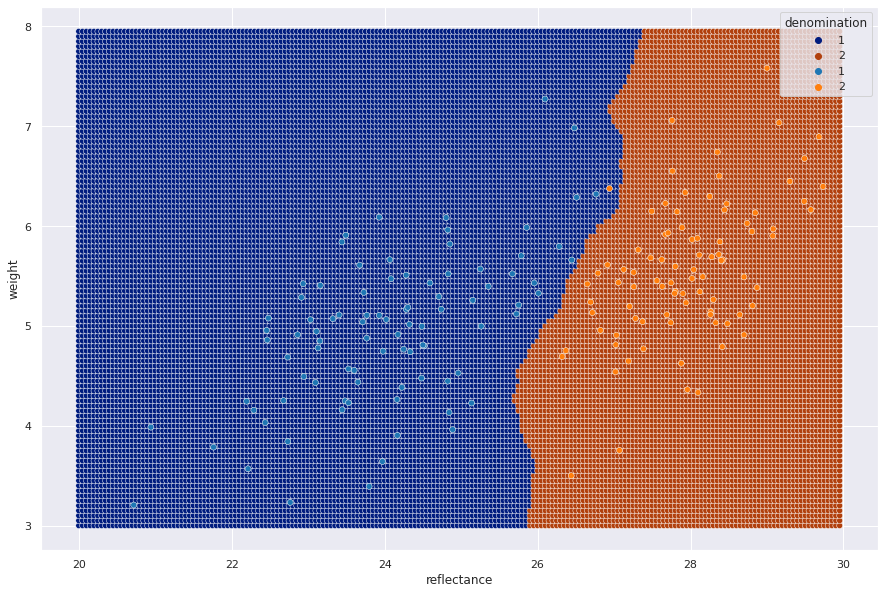

In [6]:
# define predict
def predict(x,y):
    xy = pd.DataFrame({"reflectance":[x], "weight":[y]})
    return model.predict(xy)[0]

# plot the decision boundary
plotdb(predict, originaldata=data)

---

### What values of k should we select?

### Is k=4 a good value?

---



---
### Now, we will experiment how the value of **k** changes the decision boundary
---

In [7]:
# Load interactive 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [9]:
def vary(k=1):
    model = KNN(k)
    model.fit(X_train, y_train)
    print(k,"->",model.score(X_test, y_test),end="|")
    
    def predict2(x,y):
        xy = pd.DataFrame({"reflectance":[x], "weight":[y]})
        return model.predict(xy)[0]
    
    
    plotdb(predict2,save=f"plots/KNN/{k}.png", originaldata=data)    

In [ ]:
from multiprocessing import Pool
from multiprocessing import cpu_count

pool = Pool(cpu_count())
list(pool.map(vary, range(1,50,2)))

33 -> 1.0|35 -> 1.0|37 -> 391.0 -> |1.0|41 -> 1.0|43 -> 1.0|45 -> 1.0|47 -> 1.0|49 -> 1.0|

In [11]:
from IPython.display import Image

def showplot(k):
    display(Image(f"plots/KNN/{k}.png"))
    
play = widgets.Play(
    value=1,
    min=1,
    max=49,
    step=2,
    interval=1000,
    description="Press play",
    disabled=False
)
slider = widgets.IntSlider(min=1, max=49, step=2, value=3)
widgets.jslink((play, 'value'), (slider, 'value'))
widgets.HBox([play, slider])

display(play)

interact(showplot, k=slider);

Play(value=1, description='Press play', interval=1000, max=49, min=1, step=2)

interactive(children=(IntSlider(value=3, description='k', max=49, min=1, step=2), Output()), _dom_classes=('wi…

[KNN for multiclass (Stanford CS231n-demos)](http://vision.stanford.edu/teaching/cs231n-demos/knn/)